In [ ]:
def horizontal_line(upperleft, downright,contoured_img):
    #TODO #2:10等分位置の作成
    global PIXEL2NANOMETER
    img = contoured_img

    #線が横の場合、upperleftからdownrightの幅[0]を使用する
    start = upperleft[0]
    stop = downright[0]
    # 線の真ん中に10個欲しいので、12個
    num = 12

    lins = np.linspace(start, stop, num)[1:11]
    #ピクセルとして扱うため、intに変換
    lins_pixel = [int(x) for x in lins]
    #TODO:横ピクセルに相当する縦ピクセルの最大値と最小値を取得する

    max_contours = [x[0] for x in max_contour]
    gauges = []

    for horizontal_point in lins_pixel:
        data = [x for x in max_contours if x[0]==horizontal_point]
        gauges.append(data)

    # imgg = cv2.imread('testoutput.jpg')

    #TODO:list作成
    gauge_list = []

    for gauge in gauges:
        pt1 = np.amin(gauge,axis=0)
        pt2 = np.amax(gauge,axis=0)

        img = cv2.line(img,pt1,pt2,(0,255,0),thickness=5)
        length = int(abs((pt2 - pt1).sum()*PIXEL2NANOMETER))
        text = f'{length}nm'
        point=(int(pt1[0]),min(pt1[1],pt2[1])-20)
        img = cv2.putText(img, text, point, cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), thickness=2)
        gauge_list.append(length)
    #CSV形式にて、[元画像ファイル名,出力画像ファイル名,縦横判定,白黒判定,線幅 X 10]

    return gauge_list, img

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 100nm = 46pixel
PIXEL2NANOMETER = 100/46

input_filename = "yoko.jpg"
img = cv2.imread(input_filename)


#BGR =>　グレースケールに変換
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# edges = cv2.Canny(gray,90,450,apertureSize = 3)
# lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/360, threshold=60, minLineLength=10, maxLineGap=10)
# for line in lines:
#     x1, y1, x2, y2 = line[0]
#     red_line_img = cv2.line(img, (x1,y1), (x2,y2), (0,0,255), 3)

# cv2.imwrite("output3.jpg", red_line_img)

In [47]:
#グレースケール　=>　二値に変換
ret, thresh = cv2.threshold(gray, 127,255, cv2.THRESH_BINARY_INV)

# todo: 白黒判定を行って、必要とあらば反転する

# contours, hierarchyとして出力
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 面積が最大の輪郭を取得する
max_contour = max(contours, key=lambda x: cv2.contourArea(x))

# output = cv2.drawContours(img, contours, -1, (255, 0, 255), 3)
output = cv2.drawContours(img, max_contour, -1, (255, 0, 255), 3)

#輪郭をtestoutput.jpgとして検出
cv2.imwrite("testoutput.jpg",output)



True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 100nm = 46pixel
PIXEL2NANOMETER = 100/46

input_filename = "yoko.jpg"
img = cv2.imread(input_filename)


#BGR =>　グレースケールに変換
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# edges = cv2.Canny(gray,90,450,apertureSize = 3)
# lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/360, threshold=60, minLineLength=10, maxLineGap=10)
# for line in lines:
#     x1, y1, x2, y2 = line[0]
#     red_line_img = cv2.line(img, (x1,y1), (x2,y2), (0,0,255), 3)

# cv2.imwrite("output3.jpg", red_line_img)

In [ ]:
#線の縦横判定　最小値と最大値の差が大きいかを判断する
downright = max_contour.max(axis=0)[0]
upperleft = max_contour.min(axis=0)[0]

contour_horizontal = True

# 輪郭領域の(横の長さ)-(縦の長さ)
if (downright[0] - upperleft[0]) > (downright[1] - upperleft[1]):
    contour_horizontal = True
elif  (downright[0] - upperleft[0]) > (downright[1] - upperleft[1]):
    contour_horizontal = False
else:
    # TODO: #1 エラーを起こす
    pass


#画像のサイズ取得
h,w = thresh.shape
print(h,w)

#TODO #2:10等分位置の作成

#線が横の場合、upperleftからdownrightの幅[0]を使用する
start = upperleft[0]
stop = downright[0]
# 線の真ん中に10個欲しいので、12個
num = 12

lins = np.linspace(start, stop, num)[1:11]
#ピクセルとして扱うため、intに変換
lins_pixel = [int(x) for x in lins]


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 100nm = 46pixel
PIXEL2NANOMETER = 100/46

input_filename = "yoko.jpg"
img = cv2.imread(input_filename)


#BGR =>　グレースケールに変換
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# edges = cv2.Canny(gray,90,450,apertureSize = 3)
# lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/360, threshold=60, minLineLength=10, maxLineGap=10)
# for line in lines:
#     x1, y1, x2, y2 = line[0]
#     red_line_img = cv2.line(img, (x1,y1), (x2,y2), (0,0,255), 3)

# cv2.imwrite("output3.jpg", red_line_img)

In [95]:
#線の縦横判定　最小値と最大値の差が大きいかを判断する
downright = max_contour.max(axis=0)[0]
upperleft = max_contour.min(axis=0)[0]

contour_horizontal = True

# 輪郭領域の(横の長さ)-(縦の長さ)
if (downright[0] - upperleft[0]) > (downright[1] - upperleft[1]):
    contour_horizontal = True
elif  (downright[0] - upperleft[0]) > (downright[1] - upperleft[1]):
    contour_horizontal = False
else:
    # TODO: #1 エラーを起こす
    pass


#画像のサイズ取得
h,w = thresh.shape
print(h,w)

#TODO #2:10等分位置の作成

#線が横の場合、upperleftからdownrightの幅[0]を使用する
start = upperleft[0]
stop = downright[0]
# 線の真ん中に10個欲しいので、12個
num = 12

lins = np.linspace(start, stop, num)[1:11]
#ピクセルとして扱うため、intに変換
lins_pixel = [int(x) for x in lins]



1074 1584


In [158]:
#TODO:横ピクセルに相当する縦ピクセルの最大値と最小値を取得する
# res = np.where(max_contour[:][0][0]==143)
# type(max_contour[0][0][0])
max_contours = [x[0] for x in max_contour]
gauges = []
for vertical_point in lins_pixel:
    data = [x for x in max_contours if x[:][1]==vertical_point]
    gauges.append(data)
    

[array([1578,  543], dtype=int32), array([1583,  543], dtype=int32)]

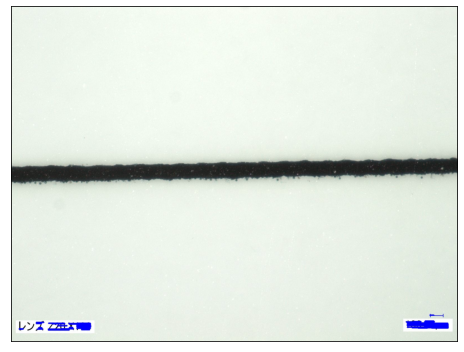

In [8]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img_p = cv2.imread('output3.jpg')
imgr_p2 = img[:,:,::-1]
plt.figure(figsize=(8,8))
plt.xticks([]), plt.yticks([]) 
plt.imshow(img_p)